# Կեղծ լուրերի հայտնաբերում Python-ի և Machine Learning-ի միջոցով
Ի՞նչ է կեղծ լուրերը:

Դեղին լրագրության մի տեսակ՝ կեղծ լուրերը ներառում են լուրեր, որոնք կարող են կեղծիք լինել և ընդհանուր առմամբ տարածվում են սոցիալական լրատվամիջոցների և այլ առցանց լրատվամիջոցների միջոցով: Սա հաճախ արվում է որոշակի գաղափարներ առաջ մղելու կամ պարտադրելու համար և հաճախ ձեռք է բերվում քաղաքական օրակարգերով: Նման լուրերը կարող են պարունակել կեղծ և/կամ չափազանցված պնդումներ և կարող են ի վերջո դառնալ վիրուսային ալգորիթմների միջոցով, իսկ օգտատերերը կարող են հայտնվել ֆիլտրի փուչիկի մեջ:
Ի՞նչ է TfidfVetorizer-ը:

TF (Term Frequency): Փաստաթղթում բառի հայտնվող դեպքերի թիվը նրա տերմինի հաճախականությունն է: Ավելի բարձր արժեքը նշանակում է, որ տերմինն ավելի հաճախ է հայտնվում, քան մյուսները, և, հետևաբար, փաստաթուղթը լավ համընկնում է, երբ տերմինը որոնման տերմինների մաս է կազմում:

IDF (Փաստաթղթի հակադարձ հաճախականություն). Բառերը, որոնք հանդիպում են բազմաթիվ անգամ փաստաթղթում, բայց նաև շատ անգամներ հանդիպում են շատ այլ փաստաթղթերում, կարող են անտեղի լինել: IDF-ն չափում է, թե որքան կարևոր է տերմինը ամբողջ կորպուսում:

TfidfVetorizer-ը չմշակված փաստաթղթերի հավաքածուն վերափոխում է TF-IDF հատկանիշների մատրիցայի:
Ի՞նչ է պասիվ ագրեսիվ դասակարգիչը:

Պասիվ ագրեսիվ ալգորիթմները առցանց ուսուցման ալգորիթմներ են: Նման ալգորիթմը մնում է պասիվ դասակարգման ճիշտ արդյունքի համար և դառնում է ագրեսիվ սխալ հաշվարկի, թարմացման և ճշգրտման դեպքում: Ի տարբերություն շատ այլ ալգորիթմների, այն չի համընկնում: Դրա նպատակն է թարմացումներ կատարել, որոնք շտկում են կորուստը՝ առաջացնելով քաշի վեկտորի նորմայի շատ քիչ փոփոխություն։
Կեղծ լուրերի հայտնաբերում Python-ի միջոցով

Կառուցել մոդել, որը ճշգրիտ կերպով դասակարգում է լուրերը որպես ԻՐԱԿԱՆ կամ ԿԵՂԾ:
Python-ով կեղծ լուրեր հայտնաբերելու մասին

Կեղծ լուրերի հայտնաբերման այս առաջադեմ python նախագիծը վերաբերում է կեղծ և իրական նորություններին: Օգտագործելով sklearn-ը, մենք կառուցում ենք TfidfVetorizer մեր տվյալների բազայի վրա: Այնուհետև մենք նախաստորագրում ենք Պասիվ ագրեսիվ դասակարգիչը և տեղավորում մոդելին: Ի վերջո, ճշտության միավորը և շփոթության մատրիցան մեզ ասում են, թե որքան լավ է մեր մոդելը:

https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df= pd.read_csv('news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
labels = df.label
labels.head()
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.1, random_state = 0)

In [41]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.1)

In [42]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [53]:
pac=PassiveAggressiveClassifier(max_iter=20)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=20)

In [68]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print('Predicted accurancy score is:', score)

Predicted accurancy score is: 0.9211356466876972


In [82]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [83]:
df_cm = pd.DataFrame(cm, range(2), range(2))

In [84]:
sn.set(font_scale = 1)

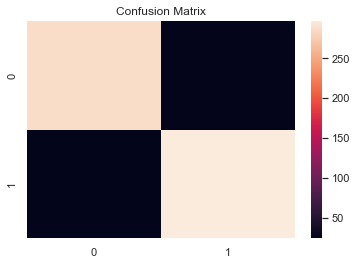


Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       313
        REAL       0.92      0.93      0.92       321

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [93]:
sn.heatmap(df_cm).set_title("Confusion Matrix")
plt.show()
print('\nClassification Report: \n', classification_report(y_test, y_pred))